In [58]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x_tr=pd.read_csv('../X_train.csv', sep=',')
y_tr=pd.read_csv('../y_train.csv', sep=',')
x_te=pd.read_csv('../X_test.csv', sep=',')

# Initial empty prediction dataframe
index = np.arange(len(x_te.iloc[:,0]))
columns = ["Id"]
rows = len(x_te.iloc[:,0])
data = np.arange(rows, dtype=int)
prediction = pd.DataFrame(data, columns=columns)

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
# Scale data MinMax
def scale(type="minmax", x_train=x_tr, x_test=x_te):
    if type=="minmax":
        scaler_x = MinMaxScaler()
    elif type=="standard":
        scaler_x = StandardScaler()
        
    scaler_x = scaler_x.fit(x_train)  # Don't cheat - fit only on training data
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)  # apply same transformation to test data
    
    return x_train, x_test, scaler_x

"""
print(x_train.mean(axis = 0))
print(x_test.mean(axis = 0))
print(y_train.mean(axis = 0))
print(x_train.std(axis = 0))
print(x_test.std(axis = 0))
print(y_train.std(axis = 0))
"""

'\nprint(x_train.mean(axis = 0))\nprint(x_test.mean(axis = 0))\nprint(y_train.mean(axis = 0))\nprint(x_train.std(axis = 0))\nprint(x_test.std(axis = 0))\nprint(y_train.std(axis = 0))\n'

In [60]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
def poly(features=3, x_train=x_tr, x_test=x_te):

    poly = PolynomialFeatures(features)

    x_train = poly.fit_transform(x_train)
    x_test = poly.fit_transform(x_test)
    
    return x_train, x_test

In [61]:
#makescorer
from sklearn.metrics.scorer import make_scorer
def rmse(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = sqrt(mse)

    print(rmse)
    return rmse

In [127]:
#Lasso regression pipeline (l1 regularisation)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([("scaler1", StandardScaler()),
                  ("poly", PolynomialFeatures(degree=5)),
                  ("scaler2", StandardScaler()),
                  ("lasso", linear_model.ElasticNetCV(l1_ratio=1.0, cv=3, max_iter=1e6))
                 ])

param_grid = {
    'lasso__alphas': list(np.linspace(0.1, 10.0, 50).reshape(50,1))
}
search = GridSearchCV(pipe, param_grid, cv=5, error_score="raise", scoring="neg_mean_absolute_error")
print("Best Params:" + str(search.fit(x_tr, y_tr["PRP"]).best_params_))

model = search.fit(x_tr, y_tr["PRP"]).best_estimator_


prediction["PRP"] = np.around(model.predict(x_te)).astype(int)
#prediction.iloc[35]["PRP"] *= 2
print(prediction.to_string(index=False))
prediction.to_csv("n_lr_results.csv", index=False)
print(model.score(x_tr, y_tr["PRP"]))
calc_rmse()

 Id   PRP
  0    43
  1   154
  2    22
  3   382
  4    56
  5    25
  6    73
  7    33
  8    41
  9    26
 10    29
 11    27
 12   262
 13    49
 14   148
 15    36
 16    37
 17    46
 18    35
 19   153
 20    97
 21    30
 22    65
 23    23
 24   154
 25   115
 26    75
 27   379
 28    31
 29   316
 30   113
 31    17
 32    71
 33   177
 34    43
 35  1002
 36    25
 37   379
 38    44
 39    37
 40   113
0.9423685320925181
42.6571699288814


42.6571699288814

 Id   PRP
  0    12
  1   139
  2    18
  3   522
  4    44
  5    23
  6    61
  7    35
  8    46
  9    32
 10   201
 11    26
 12   282
 13    46
 14   127
 15    37
 16    28
 17    39
 18    32
 19   142
 20    63
 21    29
 22    49
 23    20
 24   140
 25    97
 26    66
 27   495
 28    33
 29   359
 30    80
 31     7
 32    60
 33   158
 34    43
 35  1176
 36    25
 37   495
 38    38
 39    38
 40    80
0.982645986142639
64.29599995144409


C:\Users\maxkb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


64.29599995144409

[[ 9233.7796813    915.03714224  3763.67422763  2081.4983545
  12787.27184556]
 [ 9114.50385607   911.43123116  3727.15379587  2054.59757413
  12685.17930114]
 [ 8997.47844097   908.06790204  3690.87819509  2028.37360375
  12577.57507944]
 [ 8882.35555295   904.91110872  3650.93619383  2002.77792419
  12470.75247956]
 [ 8769.14265615   901.96023499  3600.05295285  1977.80196617
  12364.76522104]
 [ 8657.83961364   899.21523971  3551.76668725  1953.44461126
  12259.65020962]
 [ 8548.44274935   896.6761235   3504.33823757  1929.70526667
  12155.28531742]
 [ 8440.9535924    894.34288635  3457.61775996  1906.58365294
  12051.90634552]
 [ 8335.33518236   892.21552825  3411.59235656  1884.07963805
  11949.43174413]
 [ 8231.577914     890.2940492   3366.26337639  1862.1931597
  11847.84448706]
 [ 8130.72021424   888.57844921  3321.63116935  1840.30402177
  11747.14095483]
 [ 8038.94585061   887.07350333  3277.69574639  1819.50608451
  11647.32037804]
 [ 7950.60093291   885.81401612  3234.4022

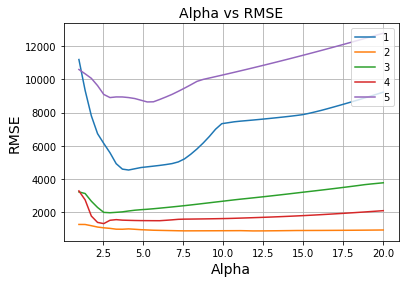

 Id   PRP
  0    44
  1   154
  2    21
  3   386
  4    55
  5    25
  6    73
  7    32
  8    41
  9    26
 10    32
 11    27
 12   263
 13    48
 14   149
 15    35
 16    36
 17    46
 18    35
 19   152
 20    97
 21    29
 22    65
 23    23
 24   154
 25   116
 26    75
 27   381
 28    30
 29   306
 30   114
 31    16
 32    71
 33   178
 34    43
 35  1009
 36    24
 37   381
 38    43
 39    36
 40   114
0.9431013591032639
41.57068620096993


41.57068620096993

In [140]:
#Lasso regression pipeline (l1 regularisation)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([("scaler1", StandardScaler()),
                  ("poly", PolynomialFeatures(degree=5)),
                  ("scaler2", StandardScaler()),
                  ("lasso", linear_model.LassoCV(alphas=np.linspace(1, 20.0, 50), cv=5, max_iter=1e6))
                 ])

model = pipe.fit(x_tr, y_tr["PRP"])
print(pipe["lasso"].mse_path_)

plt.plot(pipe["lasso"].alphas_, pipe["lasso"].mse_path_[:,0], label=1)
plt.plot(pipe["lasso"].alphas_, pipe["lasso"].mse_path_[:,1], label=2)
plt.plot(pipe["lasso"].alphas_, pipe["lasso"].mse_path_[:,2], label=3)
plt.plot(pipe["lasso"].alphas_, pipe["lasso"].mse_path_[:,3], label=4)
plt.plot(pipe["lasso"].alphas_, pipe["lasso"].mse_path_[:,4], label=5)

plt.title('Alpha vs RMSE', fontsize=14)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

prediction["PRP"] = np.around(model.predict(x_te)).astype(int)
#prediction.iloc[35]["PRP"] *= 2
print(prediction.to_string(index=False))
prediction.to_csv("n_lr_results.csv", index=False)
print(model.score(x_tr, y_tr["PRP"]))
calc_rmse()

In [28]:
# Ridge Regression
x_train, x_test, scaler = scale(type="minmax")
x_train, x_test = poly(features=3, x_train=x_train, x_test=x_test)

x_train, x_test, scaler2 = scale(type="minmax", x_train=x_train, x_test=x_test)

reg = linear_model.LassoCV(cv=5, max_iter=1e6)
reg.fit(x_train, y_tr["PRP"])
print(reg.score(x_train, y_tr["PRP"]))

rr = pd.DataFrame(data, columns=columns)
rr["PRP"] = reg.predict(x_test)
prp = np.around(rr["PRP"]).astype(int)
prediction["PRP"] = prp
    
print(prediction.to_string(index=False))
prediction.to_csv("n_lr_results.csv", index=False)

calc_rmse()

0.9535201711153846


ValueError: Shape of passed values is (41, 1), indices imply (41, 8)

In [8]:
# Get real PRP values
real_values=pd.read_csv('../machine.csv', sep=',')
raw_test=pd.read_csv('../X_test.csv', sep=',')
columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
index = np.arange(len(raw_test))
final = pd.DataFrame(index=index, columns=columns)

for i in range(len(x_te)):
    row = raw_test.loc[i]
    MYCT = row["MYCT"] == real_values["MYCT"]
    MMIN = row["MMIN"] == real_values["MMIN"]
    MMAX = row["MMAX"] == real_values["MMAX"]
    CACH = row["CACH"] == real_values["CACH"]
    CHMIN = row["CHMIN"] == real_values["CHMIN"]
    CHMAX = row["CHMAX"] == real_values["CHMAX"]
    
    new_final_row = real_values[MYCT&MMIN&MMAX&CACH&CHMIN&CHMAX]
    if len(final) > 1:
        new_final_row = new_final_row.iloc[0]
    final.iloc[i] = new_final_row
print(final["PRP"])
#print(final["ERP"])

0       38
1      208
2       12
3      307
4       45
5       45
6       52
7       20
8       53
9       25
10      30
11      38
12     248
13      71
14     214
15      36
16      32
17      36
18      31
19     134
20      41
21       8
22     105
23      24
24     106
25     133
26      45
27     367
28       6
29     198
30      51
31      20
32     109
33     237
34      30
35    1150
36      18
37     367
38      21
39      42
40      51
Name: PRP, dtype: int64


In [9]:
# Calculate MSE

from sklearn.metrics import mean_squared_error
from math import sqrt

def calc_rmse():
    slice = 12
    mse = mean_squared_error(final.iloc[:]["PRP"], prediction.iloc[:]["PRP"])
    rmse = sqrt(mse)

    print(rmse)
    return rmse
calc_rmse()

41.10159928049801


41.10159928049801